# IDS Assignment 1
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

## Get to know the data

### Question 1 (Indicating type): 
1. Identify precise type of each attribute. Note that the right answers are like: “numerical-continuous-ratio”, just Numerical or Categorical is not enough.

Explanation:
1.age:numerical-continuous-interval data
2.workclass: categorical-nominal
3.education:categorical-ordinal
4.education-num:numerical-continuous-interval data
5.marital-status:categorical-nominal
6.occupation:categorical-nominal
7.relationship:categorical-nominal
8.race:categorical-nominal
9.sex:cateforical-nominal
10.hours-per-week:continuous-interval data
11.native-country:categorical-nominal

### Question 2 (Removing outliers):
2. (a) Explore into "age" and "hours-per-week" and identify outliers (Boxplot returns whiskers). After identifying outliers, remove them (do it just once on the data set). Now you should have two data sets (cleaned and original).

In [1]:
# your code
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sns.set()
data1 = pd.read_csv('adult.data-3.csv')

plt.figure(figsize = (10,10))
plt.boxplot(data1['age'])

data1['age'].describe()

lower_quart1 = 30.0
higher_quart1 = 49.0
IQR1 = higher_quart1 - lower_quart1
upwhisker1 = higher_quart1 + 1.5*IQR1
lwwhisker1 = lower_quart1 - 1.5*IQR1

data1_clean1 = data1[(data1.age<upwhisker1) &  (data1.age > lwwhisker1) ]


,age,education-num,hours-per-week
count,14304.000000,14304.000000,14304.000000
mean,40.031040,10.491401,41.957075
std,12.026103,2.569198,5.413617
min,17.000000,1.000000,29.000000
25%,31.000000,9.000000,40.000000
50%,39.000000,10.000000,40.000000
75%,48.250000,13.000000,45.000000
max,77.000000,16.000000,59.000000


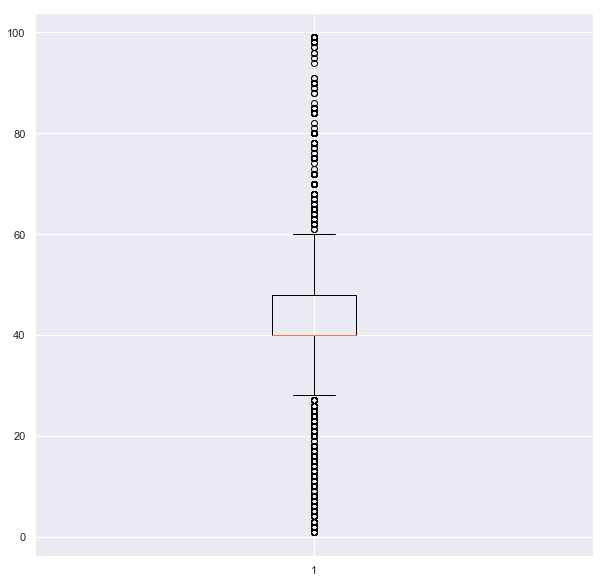

In [2]:

plt.figure(figsize = (10,10))
plt.boxplot(data1['hours-per-week'])

data1['hours-per-week'].describe()

lower_quart2 = 40.0
higher_quart2 = 48.0
IQR2 = higher_quart2 - lower_quart2
upwhisker2 = higher_quart2 + 1.5*IQR2
lwwhisker2 = lower_quart2 - 1.5*IQR2

data1_clean2 = data1[(data1['hours-per-week']<upwhisker2) &  (data1['hours-per-week'] > lwwhisker2) ]

#cleaned data
data_clean = data1[(data1['hours-per-week']<upwhisker2) &  (data1['hours-per-week'] > lwwhisker2) & (data1.age<upwhisker1) &  (data1.age > lwwhisker1) ]
data_clean.describe()

2. (b) Draw Boxplot of the cleaned data set for "hours-per-week". Is there still any outlier? If so, explain why?

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1868a080>,
 'caps': [<matplotlib.lines.Line2D at 0x1a186b1dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1868aba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1877e2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1877e748>],
 'means': []}

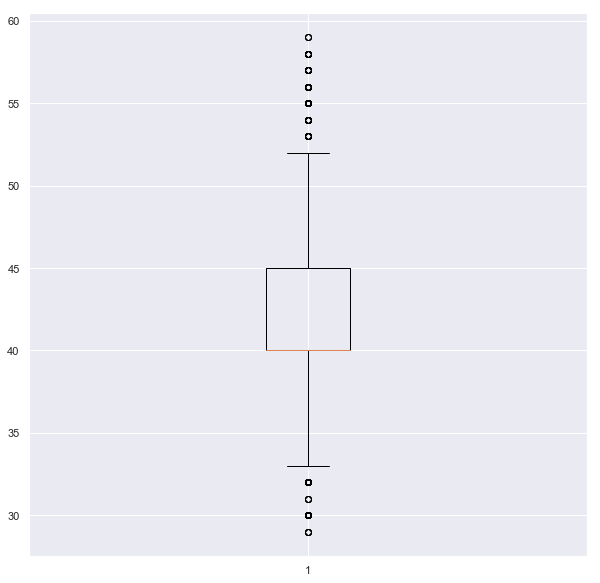

In [3]:
# your code
plt.figure(figsize=(10,10))
plt.boxplot(data_clean['hours-per-week'])

Explanation:
there are still some outliers, because if we move the outliers from previous database, then for the new database, its whiskers will be newly calculated according to its new data, so there are still will be some outliers.

### Question 3 (Basic visualization):
3. (a) Visualize mean and median of "age", and "hours-per-week" per "sex" by separate plots for the cleaned and the original data sets (there should be 8 plots, 4 plots for the original data set and 4 plots for the cleaned data set). 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


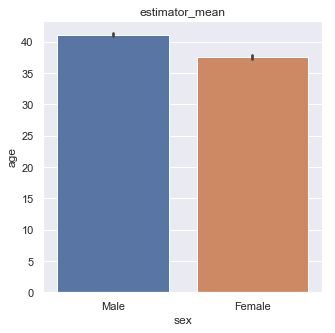

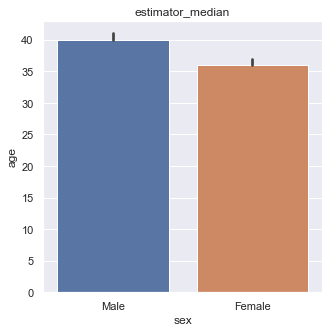

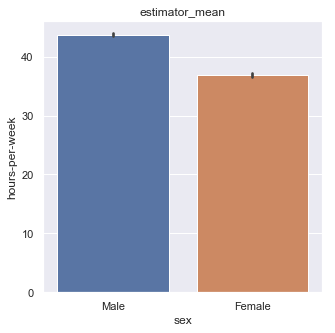

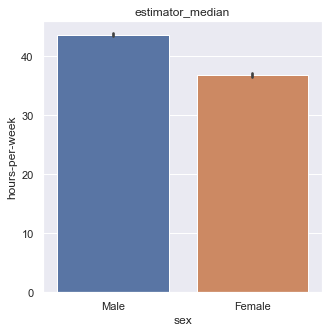

In [4]:
# your code
#for original data
plt.figure(figsize = (5,5))
age1_ori = sns.barplot(x = 'sex', y = 'age', data = data1, estimator=np.mean).set_title('estimator_mean')
plt.figure(figsize = (5,5))
age2_ori = sns.barplot(x = 'sex', y = 'age', data = data1, estimator=np.median).set_title('estimator_median')
plt.figure(figsize = (5,5))
hours1_ori = sns.barplot(x = 'sex', y = 'hours-per-week', data = data1, estimator=np.mean).set_title('estimator_mean')
plt.figure(figsize = (5,5))
hours2_ori = sns.barplot(x = 'sex', y = 'hours-per-week', data = data1, estimator=np.mean).set_title('estimator_median')



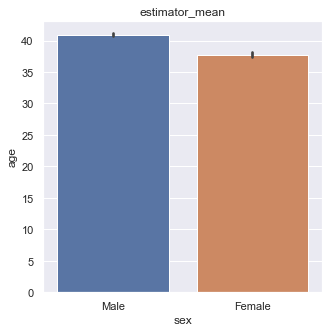

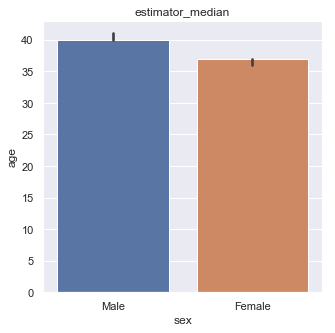

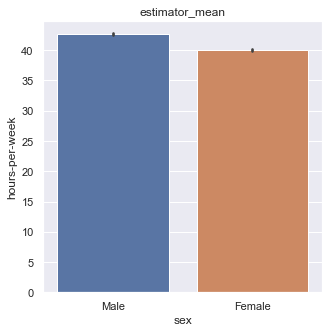

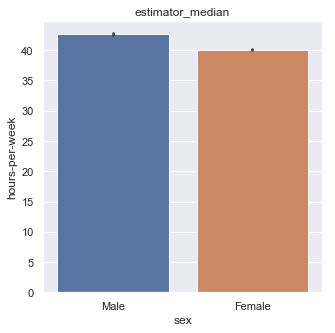

In [5]:
#for cleaned data

plt.figure(figsize = (5,5))
age1_ori = sns.barplot(x = 'sex', y = 'age', data = data_clean, estimator=np.mean).set_title('estimator_mean')
plt.figure(figsize = (5,5))
age2_ori = sns.barplot(x = 'sex', y = 'age', data = data_clean, estimator=np.median).set_title('estimator_median')
plt.figure(figsize = (5,5))
hours1_ori = sns.barplot(x = 'sex', y = 'hours-per-week', data = data_clean, estimator=np.mean).set_title('estimator_mean')
plt.figure(figsize = (5,5))
hours2_ori = sns.barplot(x = 'sex', y = 'hours-per-week', data = data_clean, estimator=np.mean).set_title('estimator_median')

3. (b) Explain how mean and median of "age" per "sex" change when you remove the outliers.

Explanation: 
the median of the age for female increased,the other didn't change much

### Question 4 (Distribution):
4. (a) Explore into distribution of "age" in the original data set. Does it have any well-known distribution (normal, uniform, skewed, ...)? If so, what are the main statistical features (mean, median, and mode) of this specific type of distribution.

mean_age = 40.10296508043271
median_age =  39.0
mode_age = 37


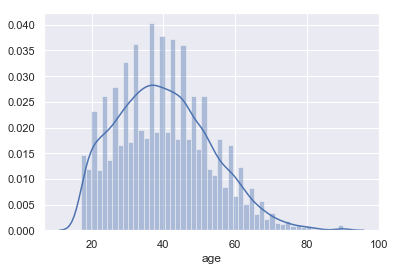

In [6]:
# your code
import statistics
sns.distplot(data1['age'])
mean_age = np.mean(data1['age'])
median_age = np.median(data1['age'])
mode_age = statistics.mode(data1['age'])
print('mean_age =',mean_age)
print('median_age = ',median_age)
print('mode_age =' ,mode_age)



Explanation:
the distribution is skewed

4. (b) Explore into distribution of "age" and "hours-per-week" together. Explain how the data is distributed with respect to these two attributes in the original data sets (using Jointplot)?


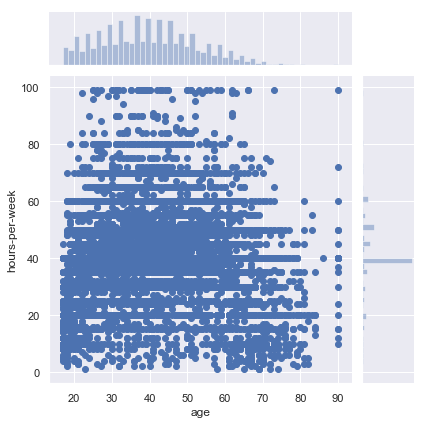

In [7]:
# your code
sns.jointplot(x = 'age', y = 'hours-per-week', data = data1, kind='scatter')

Explanation:these two data are independently distributed,

## Building models to perform predictions

### Question 5 (Decision Tree):
5. (a) Consider all the categorical attributes except label as descriptive features and label (income) as target feature. Make two decision trees (one based on Entropy and another based on Gini).

In [8]:
# your code
from sklearn import tree
from subprocess import check_output
import pandas as sns
from DecisionTree import DecisionTree

# importing data
data = pd.read_csv('adult1.csv')
data = data.drop(['hours-per-week', 'age', 'education-num'], axis = 1)
columns = data.columns
des_feature = columns[:-1]
label = columns[-1]

for column in columns:
    data[column] = data[column].astype(str)
    
data_des = data[des_feature].values
data_label = data[label].values



#using Entropy
decisionTree = DecisionTree(data_des.tolist(), des_feature.tolist(), data_label.tolist(), "entropy")

decisionTree.id3(0,0)
decisionTree.print_visualTree()

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))









ModuleNotFoundError: No module named 'graphviz'

In [10]:
#using Gini
decisionTree = DecisionTree(data_des.tolist(), des_feature.tolist(), data_label.tolist(), "gini")

decisionTree.id3(0,0)

decisionTree.print_visualTree()


print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  None
System gini:  0.49267787898095206


5. (b) What are the best attributes (based on Gini and Entropy) for splitting the trees in the third round of ID3?   

Explanation: the occupation

5. (c) Prune the tree which is made based on Entropy by 7000 as minimum number of samples. Identify which value of the first node/attribute is chosen to be split in the second round of ID3 and explain why?

In [11]:
# your code
#prune the decisiontree which is using Entropy
decisionTree = DecisionTree(data_des.tolist(), des_feature.tolist(), data_label.tolist(), "entropy")

decisionTree.id3(0,7000)
decisionTree.print_visualTree()

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))


System entropy:  0.9894104774720454
System gini:  None


Explanation: the relationship, because when choosing Husband to be split the decision tree will get the biggest information gain.

### Question 6 (Regression):

6. (a) Create two sets of independent variables (1) and (2)

In [9]:
# your code
target = data1['label']
var_1 = data1[['age', 'marital-status','sex']]
var_2 = data1[['workclass', 'education', 'hours-per-week']]
data_ori = data1.drop('label', axis = 1) 


6. (b) Which attributes are suitable as an input for the logistic regression and which need to be modified first? Why? 

Explanation:
'age', 'hours-per-week'(numerical) are suitable inputs for the logistic regression, and the rest of the categorical features should be modified first. Because the regression method use numerical inputs values to compute out a target value, so the numerical features('age', 'hours-per-week') are suitable. And the categorical features need to be first  modified to numerical features.

In [10]:
# your modification
import pandas as pd

var_1_mdf = pd.get_dummies(var_1)
var_2_mdf = pd.get_dummies(var_2)
var_3_mdf = pd.get_dummies(data_ori)


6. (c) Train three logistic regression classifiers based on the two created data sets as well as the initial data set:

#document:
    I used the fuction pandas.get_dummies() to make the categorical features into numerical features.
    I used the function sklearn.linear_model.LogisticRegression to train a logisticregression classifier, in this fucntion paremeters multi_class = 'ovr' is used to transform the label into a binary number.
    I used function classifier.fit() to load the features and label into the classifier.
    I used funciton classifier.predict() to generate a label prediction based on the training data.

In [11]:
# your code
from sklearn.linear_model import LogisticRegression

#first classifier with(1)
X1 = var_1_mdf
Y1 = target

classifier1 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
model1 = classifier1.fit(X1,Y1.ravel())
y_pred1 = classifier1.predict(X1)



#second classififer with (2)
X2 = var_2_mdf
Y2 = target

classifier2 = LogisticRegression(solver = 'liblinear',multi_class ='ovr')
model2 = classifier2.fit(X2,Y2.ravel())
y_pred2 = classifier2.predict(X2)


#third classifier with (3)
X3 = var_3_mdf
Y3 = target

classifier3 = LogisticRegression(solver = 'liblinear',multi_class ='ovr')
model3 = classifier3.fit(X3,Y3.ravel())
y_pred3 = classifier3.predict(X3)

#compare three models 
cri1 = Y1 == y_pred1
cri2 = Y2 == y_pred2
cri3 = Y3 == y_pred3

#compute the misclassified samples in each model
mis1 = [item for item in cri1 if item == False]
mis2 = [item for item in cri2 if item == False]
mis3 = [item for item in cri3 if item == False]
print('the number of misclassified samples in model 1 is:\n', len(mis1))
print('the number of misclassified samples in model 2 is:\n', len(mis2))
print('the number of misclassified samples in model 3 is:\n', len(mis3))



the number of misclassified samples in model 1 is:
 4466
the number of misclassified samples in model 2 is:
 5314
the number of misclassified samples in model 3 is:
 3424


6. (d) Interpret the three resulting models and compare them. Which model do you recommend and why?

Explanation: 
these three models are using the training data to build linear classifiers, then using the features of samples to make a prediction ( determine which class this sample should be classified.)
I would recommend the third model, since it has the smallest number of misclassified samples.

### Question 7 (Neural Networks)

7. (a) What are the inputs of your network?

Explanation:
the descriptive features of the dataset

7. (b) What are the possible number of input pattern for your network (just including categorical attributes)?

In [15]:
#calculate
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('adult.data-3.csv')
label = data['label']

data_categ = data.drop(['age', 'label','hours-per-week','education-num'],axis = 1)
x_training = pd.get_dummies(data_categ)
input_num_catego = len(x_training.columns)
print('the possible number of input pattern is \n',input_num_catego)

the possible number of input pattern is 
 101


Explaination:

7. (c.i) First, with default parameters and return the parameters.

In [16]:
# your code
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric


data = pd.read_csv('adult.data-3.csv')
label = data['label']
y_training = pd.get_dummies(label)['>50K']
y_true = y_training

#processing the categorical input
data_categ = data.drop(['age', 'label','hours-per-week','education-num'],axis = 1)
data_categ_encode = pd.get_dummies(data_categ)
x_training = pd.concat([data_categ_encode,data['age'],data['hours-per-week'],data['education-num']],axis = 1) #combine the numerical features

#train the neuron_network
mpl = MLPClassifier()
mpl.fit(x_training,y_training)
y_pred = mpl.predict(x_training)


#output the parameters
print(y_pred)
print([coef.shape for coef in mpl.coefs_])
print(mpl.coefs_)

#evaluation the accurancy
accuracy = metric.accuracy_score(np.array(y_true).flatten(),np.array(y_pred).flatten(),normalize='true')
print('the accuracy of this model is \n',accuracy)



[1 0 0 ... 0 0 1]
[(104, 100), (100, 1)]
[array([[-1.87563947e-02, -1.09528924e-01, -7.62527028e-03, ...,
        -8.88565013e-02,  6.97538746e-02,  2.93087751e-02],
       [ 2.18079227e-02,  2.05482866e-02,  3.65651896e-05, ...,
        -2.44407399e-02, -8.98712295e-02,  1.10615118e-01],
       [-1.56686712e-01, -4.01385337e-02, -7.07163363e-05, ...,
         1.32076004e-01,  1.70935804e-01,  1.52392709e-01],
       ...,
       [ 4.85276191e-02,  4.92408169e-02, -2.13674174e-02, ...,
        -1.00173659e-01, -1.30137638e-01, -4.63760125e-03],
       [ 9.68920549e-02,  2.87647759e-02, -1.89600627e-02, ...,
         1.48380049e-01,  1.66671151e-01,  1.59204086e-01],
       [ 1.51300599e-01,  9.55098522e-02, -1.51187814e-02, ...,
         8.78766912e-02, -7.77985055e-03, -6.80870302e-02]]), array([[ 1.33894236e-01],
       [ 2.40326563e-01],
       [ 7.93499189e-03],
       [-2.46881440e-01],
       [ 1.16871890e-01],
       [-8.53547457e-02],
       [-1.35948733e-01],
       [-2.0040121

7. (c.ii) Second, try to find the optimized number of hidden layers and nodes. (Start with default number and then at least go with one number above and one number below the default) 


In [17]:
#function to compute the accuracy 
def getacry(x,y):
    accuracy= metric.accuracy_score(np.array(x).flatten(),np.array(y).flatten(),normalize=True)
    return accuracy
#function to compute the prediction
def getpred(x,y,classifier):
    classifier.fit(x,y)
    pred = classifier.predict(x)
    return pred

In [18]:
# your code for lower number of hidden layers


# your code for higher number of hidden layers
mpl_high = MLPClassifier(hidden_layer_sizes=(100,100))

y_pred_high = getpred(x_training,y_training,mpl_high)

accuracy_high = getacry(y_true,y_pred_high)
print('the accuracy for the model with hidden_layers (100,100) is \n',accuracy_high)

# your code for testing number of neurons in each layer   I choose 70,120
# one hidden layer 70 neurons
mpl_70 = MLPClassifier(hidden_layer_sizes=(70,))

y_pred_70 = getpred(x_training,y_training,mpl_70)

accuracy_70 = getacry(y_true,y_pred_70)
print('the accuracy for the model with hidden_layers (70,) is \n',accuracy_70)

#one hidden layer 120 neurons
mpl_120 = MLPClassifier(hidden_layer_sizes=(120,))

y_pred_120 = getpred(x_training,y_training,mpl_120)

accuracy_120 = getacry(y_true,y_pred_120)
print('the accuracy for the model with hidden_layers (120,) is \n',accuracy_120)

#testing for two hidden layers (120,120) neurons
mpl_2_120 = MLPClassifier(hidden_layer_sizes=(120,120))

y_pred_2_120 = getpred(x_training,y_training,mpl_2_120)

accuracy_2_120 = getacry(y_true,y_pred_2_120)
print('the accuracy for the model with hidden_layers (120,120) is \n',accuracy_2_120)




the accuracy for the model with hidden_layers (100,100) is 
 0.8159856510285298
the accuracy for the model with hidden_layers (70,) is 
 0.8105487360573959
the accuracy for the model with hidden_layers (120,) is 
 0.8107168880668124
the accuracy for the model with hidden_layers (120,120) is 
 0.8143041309343647


7. (c.iii) Third, try to train your model with one linear activation function and one non linear activation function, name the functions and explain if there is any difference in your networks and why? (you can use evaluation metrics to show which activation function works better for this data set)


In [19]:
# your code for linear activation function
mpl_lin = MLPClassifier(hidden_layer_sizes=(100,100),activation='identity')
mpl_lin.fit(x_training,y_training)
y_pred_lin = mpl_lin.predict(x_training)

    
    
# your code for non linear activation function
mpl_nlin = MLPClassifier(hidden_layer_sizes=(100,100),activation='logistic')
mpl_nlin.fit(x_training,y_training)
y_pred_nlin = mpl_nlin.predict(x_training)


# yor code for comparing two networks

#performance of linear model:
accuracy_lin = getacry(y_true,y_pred_lin)
print('the accuracy for the model with linear actication function is \n',accuracy_lin)

#performance of nonlinear model
accuracy_nlin = getacry(y_true,y_pred_nlin)
print('the accuracy for the model with nonlinear actication function is \n',accuracy_nlin)


the accuracy for the model with linear actication function is 
 0.7800011210133961
the accuracy for the model with nonlinear actication function is 
 0.811893952132728


Parameters: 

Explanation:
the nonlinear activation function works better for this dataset

7. (c.iv) Which model do you recommend to be used as your classifier and why? (with respect to the number of hidden layer and activation function (linear or nonlinear))

Explanation: I would recommend the model with nonlinear activation function, with 2 hidden layers and each layer has 100 neurons. Because according to my comparision , this model gets the highest score.

## Analysing the quality of the prediction models

### Question 8 (Evaluation metrics)

8. (a) Calculate the following metrics for the model 7. (c, i) and the logistic regression with all the initial attributes in question 6 (c):

- Confusion matrices on the training data

In [20]:
# your code for the confusion matrices on the training data
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix


#confusion_matrix for the model 7.(c,i)
cm1 = confusion_matrix(y_true,y_pred)
print('the confusion_matrix for the neuron_network model is \n',cm1)

#confusion_matrix for the model 6(c)
cm2 = confusion_matrix(Y3,y_pred3)
print('the confusion_matrix for the regression model is \n', cm2)


the confusion_matrix for the neuron_network model is 
 [[8074 1926]
 [1344 6497]]
the confusion_matrix for the regression model is 
 [[8132 1868]
 [1556 6285]]


- Confusion matrices on the test data

In [21]:
# your code for the confusion matrices on the test data
data_test = pd.read_csv('adult.test-3.csv')

#label preprossing
target2 = data_test['label']  
Y_true = target2 #
label2 = pd.get_dummies(target2)['>50K']
y_test_true = label2 #for nn


#descriptive fearues preprossing
data_test_des = data_test.drop(['label'],axis = 1)
x_test = pd.get_dummies(data_test_des)


#using previous nn model
y_pred_nn = mpl.predict(x_test)

cm_nn = confusion_matrix(y_test_true,y_pred_nn)
print('the confusion map for model neuron network is \n',cm_nn)


#using previous regression model
y_pre_re = classifier3.predict(x_test)

cm_reg = confusion_matrix(Y_true,y_pre_re)
print('the confusion map for model regression is \n',cm_reg)



the confusion map for model neuron network is 
 [[12435     0]
 [ 3846     0]]
the confusion map for model regression is 
 [[10080  2355]
 [  794  3052]]


- Precision, recall and F1-scores on the test data

In [23]:
# your code for precision, recall and F1-scores on the test data
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#for nn model
print('precision for nn \n',precision_score(y_test_true,y_pred_nn,pos_label=0))
print('recall for nn \n',recall_score(y_test_true,y_pred_nn,pos_label=0))
print('f1_score for nn \n',f1_score(y_test_true,y_pred_nn,pos_label=0))


#for regression model
print('precision for regression \n',precision_score(Y_true,y_pre_re,pos_label='>50K'))
print('recall for regression \n',recall_score(Y_true,y_pre_re,pos_label='>50K'))
print('f1_score for regression \n',f1_score(Y_true,y_pre_re,pos_label='>50K'))

precision for nn 
 0.7637737239727289
recall for nn 
 1.0
f1_score for nn 
 0.8660676974508984
precision for regression 
 0.5644534862215647
recall for regression 
 0.7935517420696828
f1_score for regression 
 0.6596779422889874


- Accuracy scores on training and test data

In [24]:
# your code for accuracy scores on training and test data
print(accuracy_score(y_test_true,y_pred_nn)) #for nn
print(accuracy_score(Y_true,y_pre_re))  #for regression

0.7637737239727289
0.8065843621399177


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 7.

8. (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:
I think the best model is the neuron network model, since the scores of it are generally higher than that of regression model.

8. (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
the model regression has a promblem of underfitting, since the precision is just 0.5


8. (d) In the hypothesis that a separate validation set is not available, how would you proceed in evaluating a model? Refer to the evaluation techniques seen in the lectures.

Explanation:
you can seperathe the original dataset into two parts, ont part for training, and the other part for validation.